<a href="https://colab.research.google.com/github/arpitmalhotra009/Deep_Learning/blob/main/Simple_Regression_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving Regression Problem Using Deep Learning & Keras

This is an introductory project to get started using Deep Learning.
Here we will be building a Multilayer Perceptron Model and will try to predict regression probelem.
We will be producing a dataset using SciKit Learn Library

In [1]:
from sklearn.datasets import make_regression
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow as tf

## Making Regression using Scikit Learn Datasets
The dataset contains 10000 samples, 10 features, with a std of 1.5

In [2]:
x, y , coef = make_regression(n_samples= 10000, n_features=10,noise=1.5, coef=True, bias=5, random_state = 1)

## Building a DataFrame with the values

In [47]:
df = pd.DataFrame(x, columns=[f"x_{i}" for i in range(x.shape[1])])
df['y'] = pd.DataFrame(y)
df.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,y
0,1.073403,0.454715,0.698357,1.444397,1.132215,-0.318352,-2.040233,-1.522423,-1.649781,0.366343,-78.954374
1,-0.108503,-1.006005,-0.944380,1.494124,-0.509272,-0.079141,0.677441,0.590448,0.415164,0.265678,49.259220
2,0.176335,-1.169214,0.017109,-1.072298,1.051789,1.527453,0.888388,-0.498590,-0.047014,0.081625,194.420205
3,0.556074,-0.291595,0.089686,-0.601157,-0.258983,0.189293,0.057121,-1.719394,-0.563789,-0.799547,-151.767619
4,-0.579137,-0.429576,0.852317,-0.564326,1.843884,-1.287025,0.566007,-2.440015,0.639727,-0.218123,-75.585089


In [ ]:
df.describe()

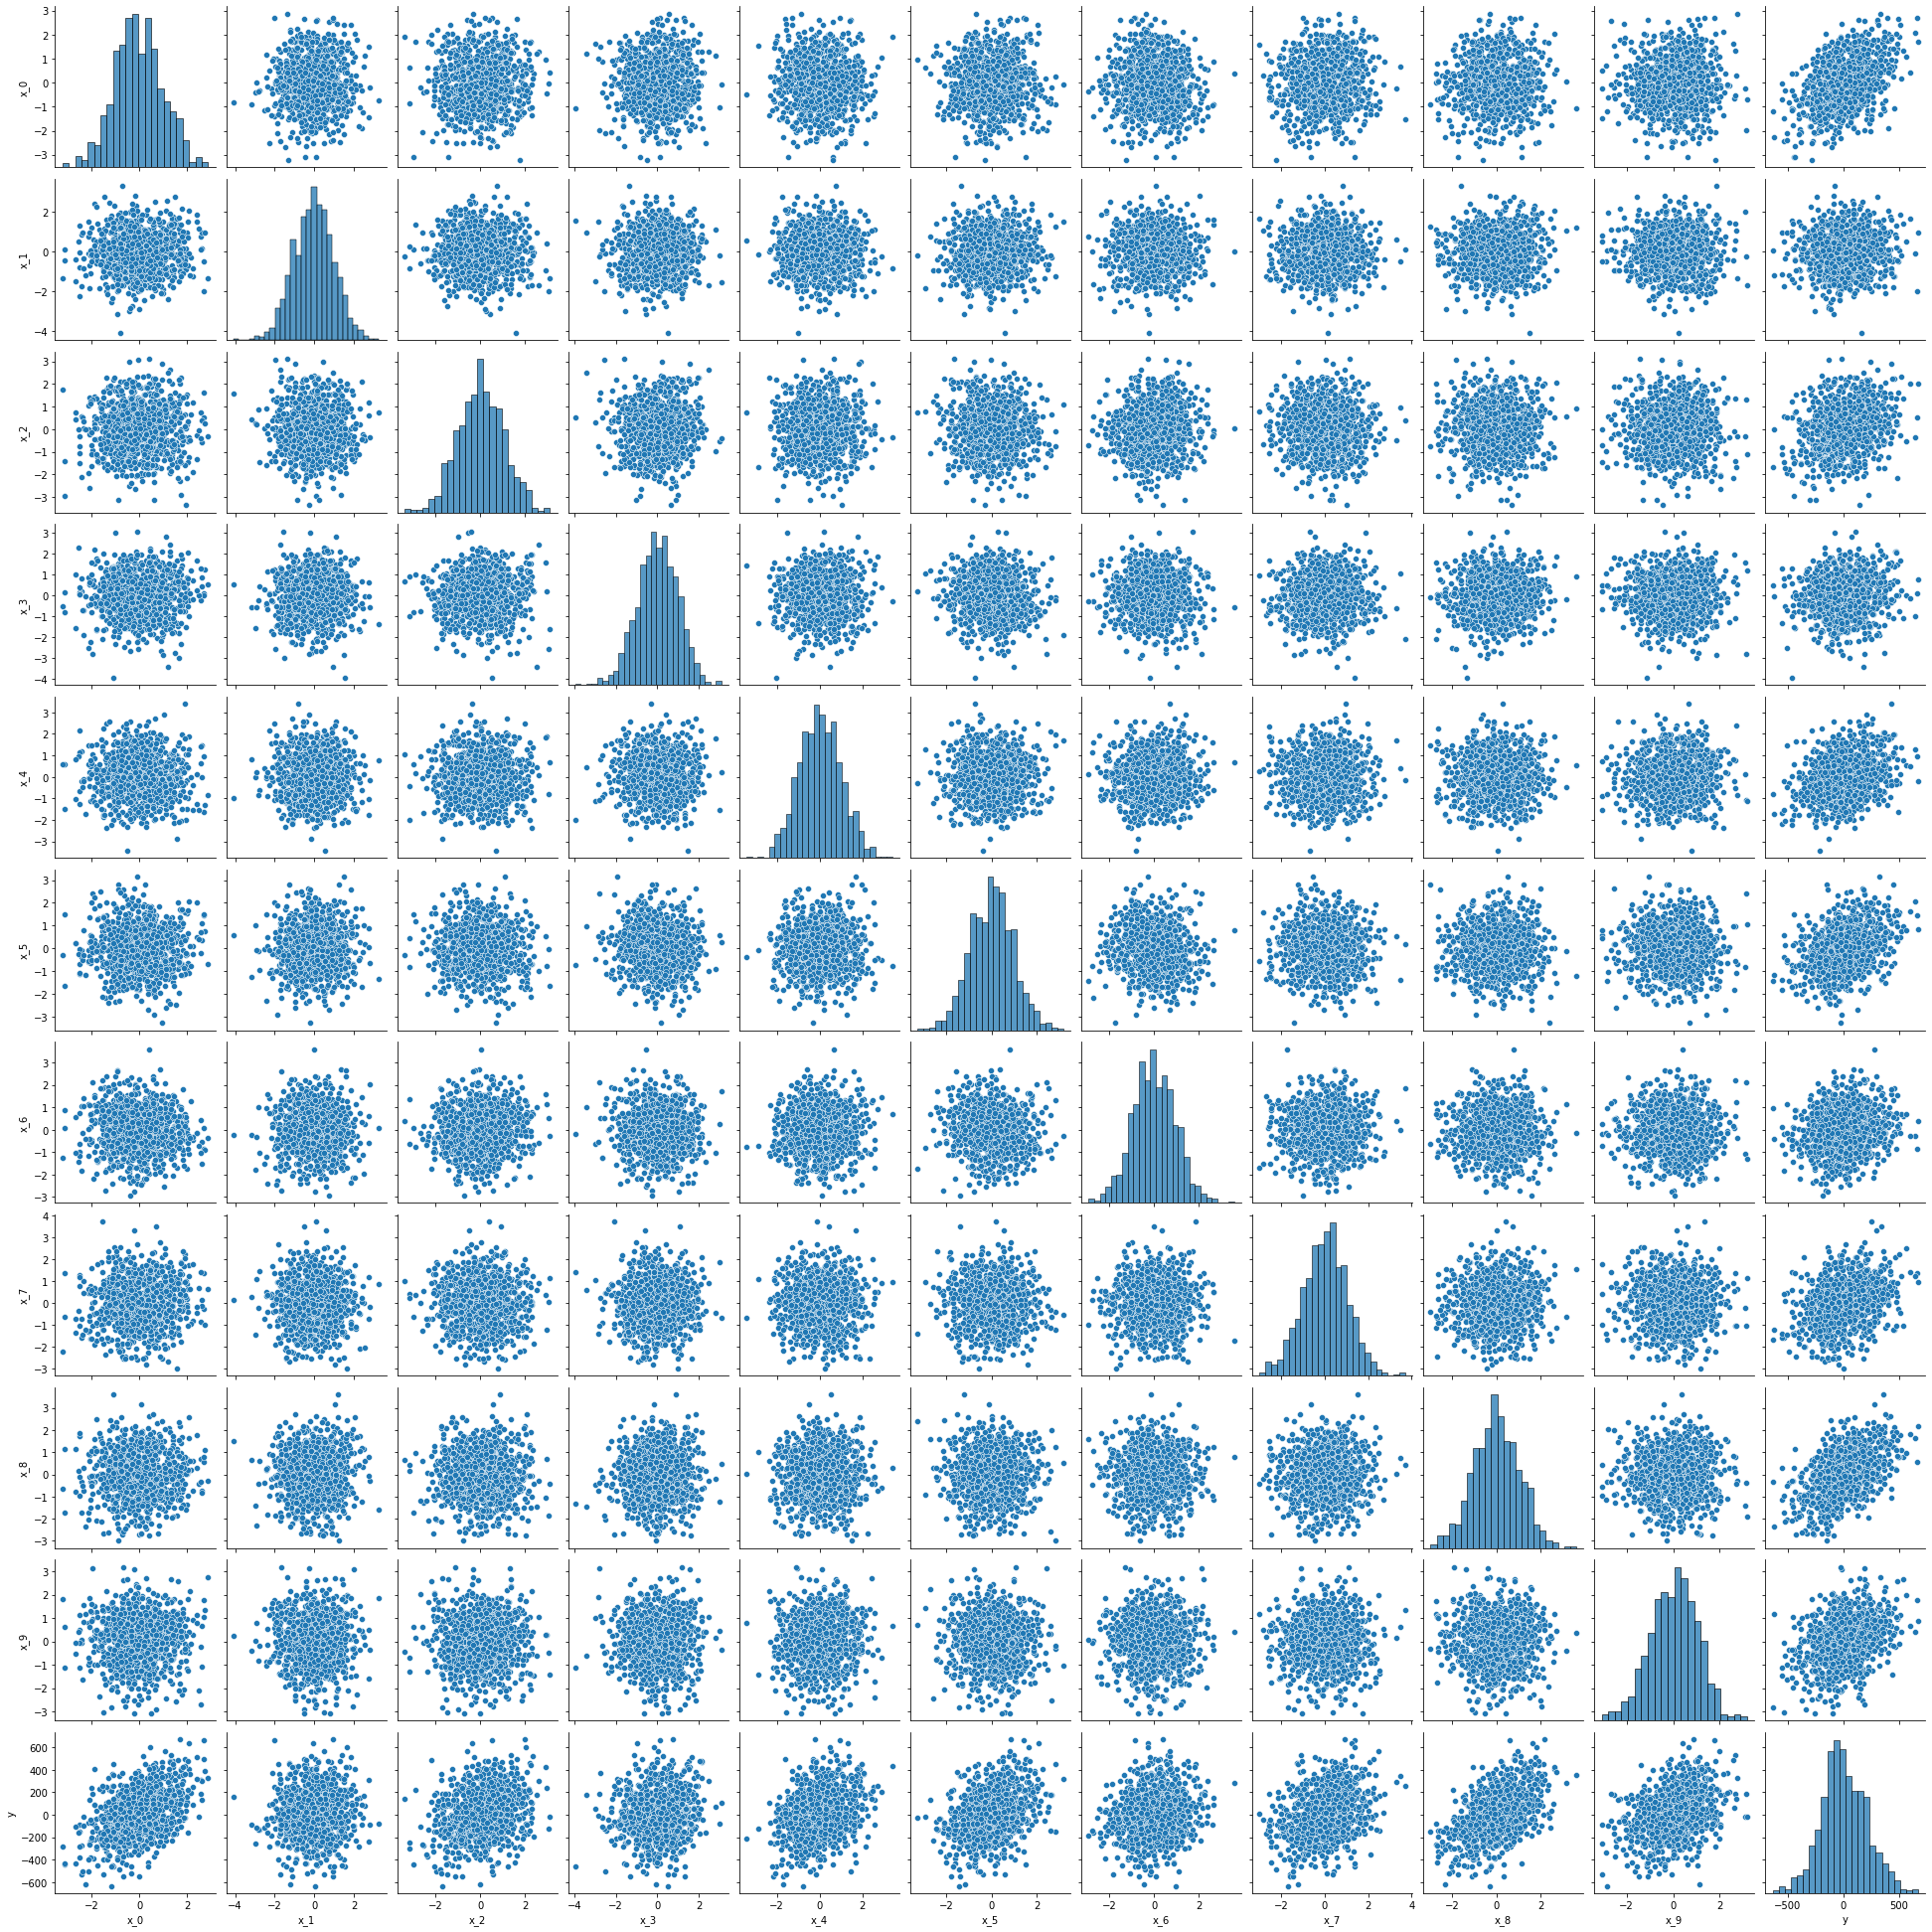

In [49]:
sns.pairplot(df.iloc[0:1000])

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [4]:
normalizer = preprocessing.Normalization()
normalizer.adapt(x_train)
print(normalizer.mean.numpy()) #same as x_train.mean(axis=0)/x_train.std(axis=0)

[ 0.00168449  0.01002013 -0.00397782  0.01097847  0.0122401   0.00455449
  0.00677579  0.01369619 -0.00078497  0.00358213]


## Building Model
The model contains 1 input layer (input size of [10, None ], 3 hidden layers  with dropout, and 1 output layer

In [19]:
normalizer = preprocessing.Normalization(input_shape=[10,])
normalizer.adapt(x_train)

In [33]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(128, activation = 'relu'),
      layers.Dropout(0.2),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.optimizers.Adam(learning_rate=0.001))
  return model

In [34]:
reg = build_and_compile_model(normalizer)
reg.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 10)                21        
_________________________________________________________________
dense_12 (Dense)             (None, 64)                704       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

## Training Model

Using 100 epochs with validation split size of 10%

In [35]:
%%time
history = reg.fit(
    x_train, y_train,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.1)

CPU times: user 40.2 s, sys: 3.22 s, total: 43.4 s
Wall time: 27.6 s


In [36]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,11.131737,3.390486,95
96,11.174836,3.039609,96
97,11.179496,3.458669,97
98,11.264032,3.048935,98
99,11.272088,3.923845,99


In [37]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

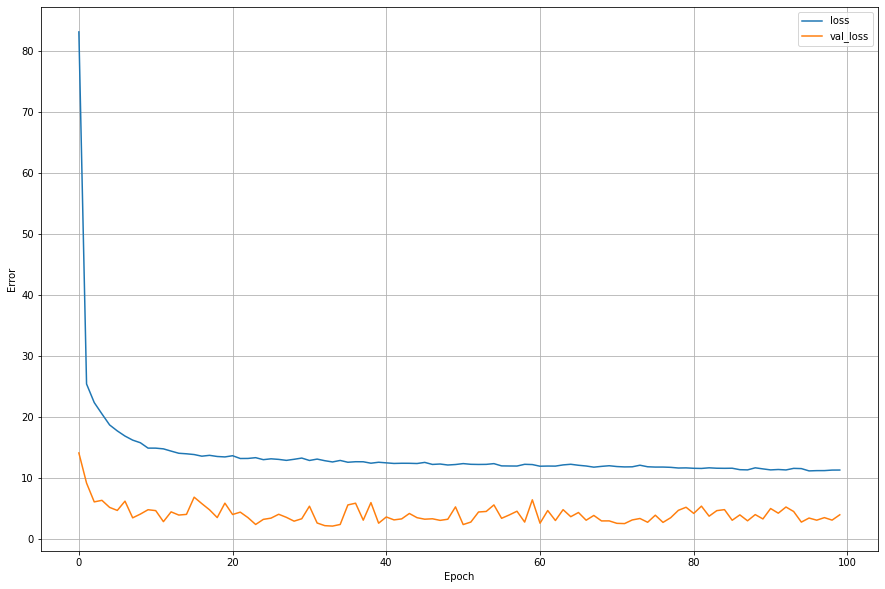

In [50]:
plt.figure(figsize=(15,10))
plt.plot(hist['loss'], label = 'loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

## Building Predictions

In [39]:
y_pred = reg.predict(x_test)

In [40]:
from sklearn.metrics import mean_absolute_error

## Calculating Score

In [41]:
print(mean_absolute_error(y_test, y_pred))

3.8369166545313838


## Comparing first 10 predictions

In [42]:
np.c_[y_test,y_pred][:10]

array([[509.77630213, 498.51641846],
       [-83.08187277, -83.81085968],
       [ 93.3119732 ,  91.54756927],
       [129.12810254, 123.05129242],
       [ 78.99437675,  78.3445816 ],
       [228.28326702, 230.98295593],
       [-53.14316392, -55.14402771],
       [239.30415085, 234.44206238],
       [470.74130861, 456.03781128],
       [ -3.58002682,  -3.4522295 ]])